In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [7]:
# config to train model using gpu

In [48]:
import pickle

X = pickle.load(open('X_1.pickle', 'rb'))
y = pickle.load(open('y_1.pickle', 'rb'))

In [49]:
type(X[0])

numpy.ndarray

In [50]:
sneakers = pd.read_csv('sneakers copy.csv')

In [54]:
y = np.where(y == 'nike', 0, y)

In [52]:
y = np.where(y == 'adidas', 1, y)

In [53]:
y

array(['nike', 'nike', 'nike', ..., '1', '1', '1'], dtype='<U6')

In [38]:
# nike = 0, adidas = 1

In [55]:
sneakers.head(3)

,Unnamed: 0,brand,name,price,image
0,0,nike,AIR FORCE 1 '07 - Trainers - white,£74.99,[[[246 246 246]\n [246 246 246]\n [246 246 2...
1,1,nike,AIR FORCE 1 '07 - Trainers - black,£74.99,[[[246 246 246]\n [246 246 246]\n [246 246 2...
2,2,nike,AIR MAX 2090 - Trainers - black/white/wolf gre...,£77.99,[[[241 241 241]\n [241 241 241]\n [241 241 2...


In [56]:
sneakers['brand'].replace(to_replace='nike', value=0, inplace = True)

In [57]:
sneakers['brand'].replace(to_replace='adidas', value=1, inplace = True)

In [58]:
import matplotlib.pyplot as plt

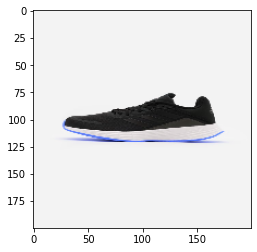

In [59]:
plt.imshow(X[980])
plt.show()

In [60]:
sneakers

,Unnamed: 0,brand,name,price,image
0,0,0,AIR FORCE 1 '07 - Trainers - white,£74.99,[[[246 246 246]\n [246 246 246]\n [246 246 2...
1,1,0,AIR FORCE 1 '07 - Trainers - black,£74.99,[[[246 246 246]\n [246 246 246]\n [246 246 2...
2,2,0,AIR MAX 2090 - Trainers - black/white/wolf gre...,£77.99,[[[241 241 241]\n [241 241 241]\n [241 241 2...
3,3,0,REACT 55 SE - Trainers - black/dark grey,£114.99,[[[246 246 246]\n [246 246 246]\n [246 246 2...
4,4,0,AIR FORCE 1 GTX UNISEX - Trainers - anthracite...,£129.99,[[[241 241 241]\n [241 241 241]\n [241 241 2...
...,...,...,...,...,...
1843,1843,1,SUPERCOURT - Trainers - savannah/solar red,£55.99,[[[246 246 246]\n [246 246 246]\n [246 246 2...
1844,1844,1,COUNTRY OG SHOES - Trainers - white,£69.95,[[[246 246 246]\n [246 246 246]\n [246 246 2...
1845,1845,1,X_PLR - Trainers - core black/trace grey metallic,£52.49,[[[246 246 246]\n [246 246 246]\n [246 246 2...
1846,1846,1,RIVALRY - Trainers - footwear white/core black,From £69.95,[[[246 246 246]\n [246 246 246]\n [246 246 2...


In [61]:
y = sneakers['brand'].values

In [62]:
type(y)

numpy.ndarray

In [63]:
y.shape

(1848,)

In [64]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle= True)

In [101]:
# random prediction
# model.predict(X_train[462].reshape((1, 200, 200, 3)))

array([[0.9997361]], dtype=float32)

## With train_test_split

In [70]:
X_train = X_train/255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = (200, 200, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), input_shape = (200, 200, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=5, epochs = 5, validation_data=(X_test, y_test))

Epoch 1/5
278/278 [==============================] - 62s 222ms/step - loss: 1.5697 - accuracy: 0.5685 - val_loss: 19.8111 - val_accuracy: 0.6753
Epoch 2/5
278/278 [==============================] - 62s 222ms/step - loss: 0.5548 - accuracy: 0.7121 - val_loss: 23.4180 - val_accuracy: 0.7965
Epoch 3/5
278/278 [==============================] - 61s 218ms/step - loss: 0.4094 - accuracy: 0.8001 - val_loss: 39.6045 - val_accuracy: 0.8247
Epoch 4/5
278/278 [==============================] - 62s 222ms/step - loss: 0.3689 - accuracy: 0.8304 - val_loss: 29.9568 - val_accuracy: 0.7814
Epoch 5/5
278/278 [==============================] - 64s 229ms/step - loss: 0.2745 - accuracy: 0.8658 - val_loss: 39.9271 - val_accuracy: 0.8030


In [71]:
# Guardar el Modelo
from tensorflow import keras
model.save('model8658.h5')

# Recrea exactamente el mismo modelo solo desde el archivo

# from tensorflow import keras
# new_model = keras.models.load_model('model8300.h5')

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 198, 198, 64)      1792      
_________________________________________________________________
activation_3 (Activation)    (None, 198, 198, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
activation_4 (Activation)    (None, 97, 97, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 147456)           

In [292]:
# video for the demo
# open a link directly after loading the picture

In [272]:
# look into scraping the link

In [269]:
# layers

In [ ]:
# pca

In [268]:
# stop it if acc drops

In [ ]:
# from tensorflow import keras
# Guardar el Modelo
# model.save('path_to_my_model.h5')
# Recrea exactamente el mismo modelo solo desde el archivo
# new_model = keras.models.load_model('path_to_my_model.h5')

In [273]:
# explain dl flaws

In [ ]:
X = X/255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = (200, 200, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), input_shape = (200, 200, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X, y, batch_size=10, epochs = 3, validation_split=0.1)